Use the same dataset from the K-Means assignment. Implement Hierarchical
Clustering. Generate and interpret the dendrogram to determine the optimal number
of clusters. Compare and contrast the results with the K-Means analysis.

1. Setup and Data Preparation

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
import scipy.cluster.hierarchy as sch # For the dendrogram

# --- 1. Load and Prepare Data ---

# Load the dataset
url = 'https://raw.githubusercontent.com/kennedykwangari/Mall-Customer-Segmentation-Data/master/Mall_Customers.csv'
df = pd.read_csv(url)

# Rename columns
df = df.rename(columns={
    'Annual Income (k$)': 'Income',
    'Spending Score (1-100)': 'SpendingScore'
})

# Select and scale features
X = df[['Income', 'SpendingScore']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

2. Dendrogram Generation and Interpretation

--- Generating Dendrogram ---


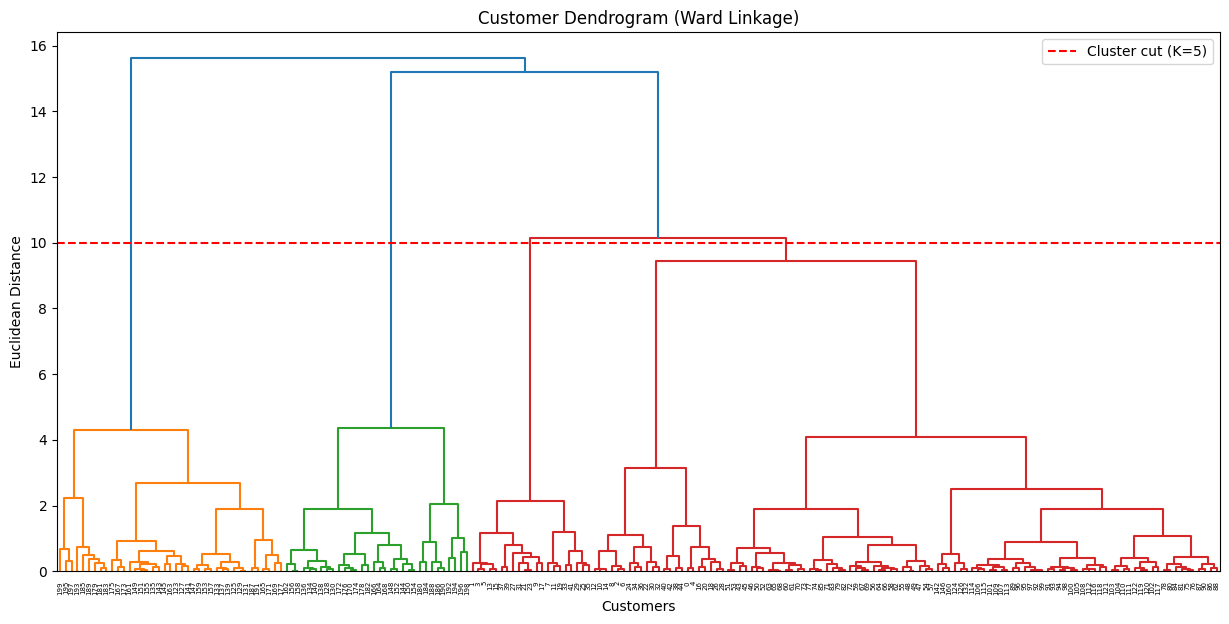

In [9]:
# --- 2. Generate and Interpret the Dendrogram ---

print("--- Generating Dendrogram ---")
plt.figure(figsize=(15, 7))
plt.title('Customer Dendrogram (Ward Linkage)')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')

# Generate the dendrogram
# sch.linkage performs the hierarchical clustering
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))

# Add a horizontal line to "cut" the tree
plt.axhline(y=10, color='red', linestyle='--', label='Cluster cut (K=5)')
plt.legend()
plt.show()

3. Fitting the Models and Visualizing

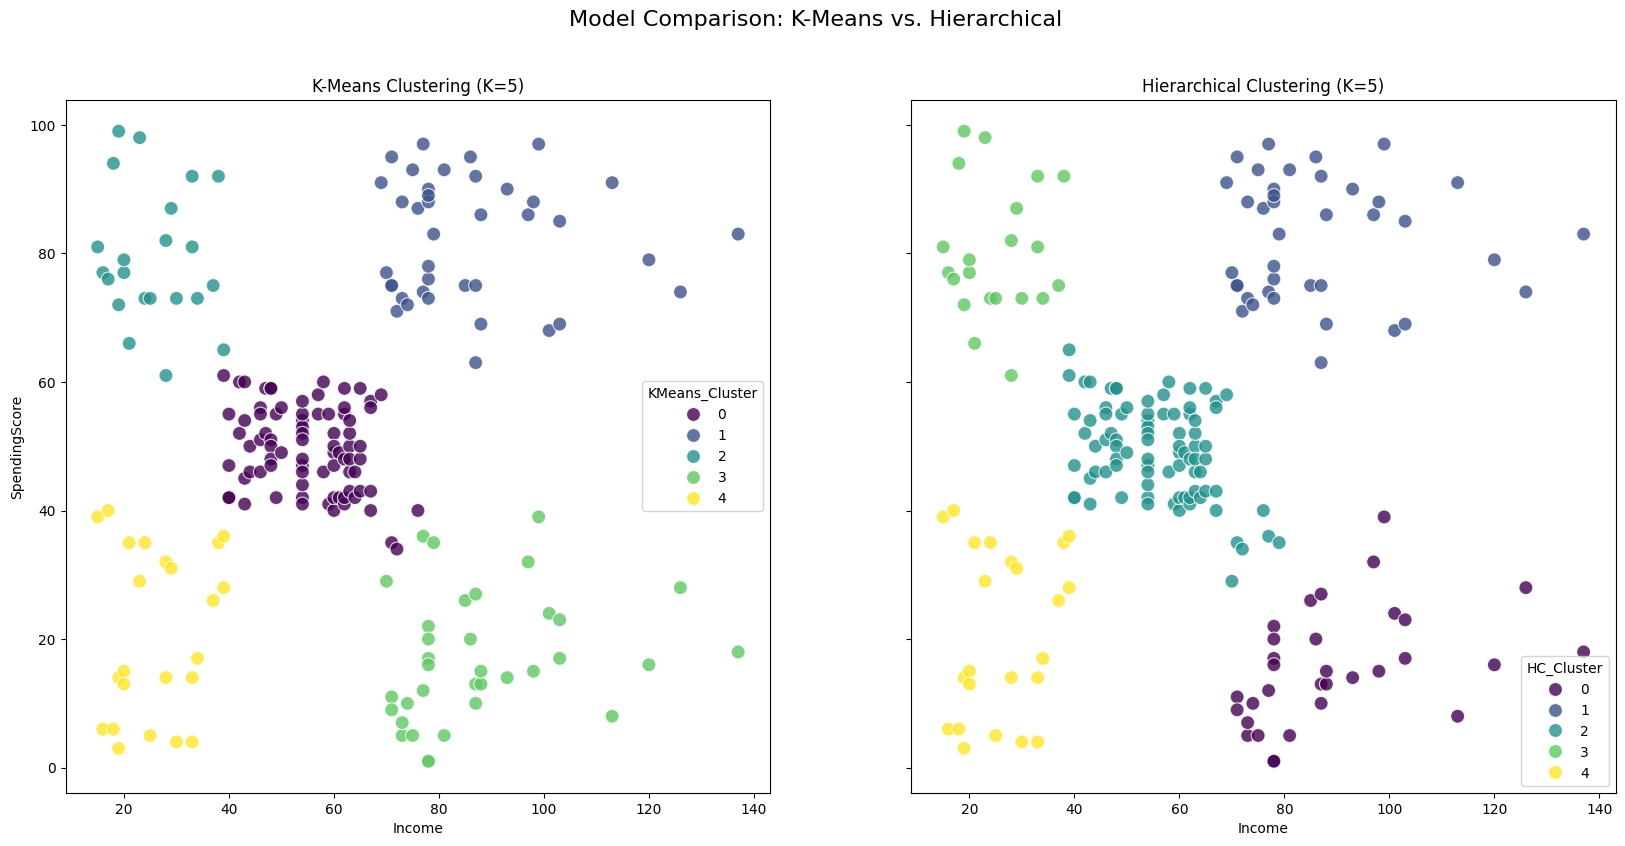

In [10]:
# --- 3. Fit Both Models ---

optimal_k = 5

# Model 1: K-Means
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Model 2: Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
df['HC_Cluster'] = hc.fit_predict(X_scaled)

# --- 4. Side-by-Side Visualization ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 9), sharey=True)

# Plot 1: K-Means Results
sns.scatterplot(data=df, x='Income', y='SpendingScore', hue='KMeans_Cluster', 
                palette='viridis', ax=ax1, s=100, alpha=0.8)
ax1.set_title('K-Means Clustering (K=5)')

# Plot 2: Hierarchical Results
sns.scatterplot(data=df, x='Income', y='SpendingScore', hue='HC_Cluster', 
                palette='viridis', ax=ax2, s=100, alpha=0.8)
ax2.set_title('Hierarchical Clustering (K=5)')

plt.suptitle('Model Comparison: K-Means vs. Hierarchical', fontsize=16)
plt.show()